# Ejercitación

A lo largo de esta ejercitación exploraremos conceptos relacionados con dinámica molecular. Utilizaremos ejemplos sencillos en dos dimensiones programados en python con el fin de ilustrarlos. Usaremos un herramienta llamada Jupyter que permite anotar y ejecutar código. Cada celda de este documento puede ser ejecutada parándose en ella y presionando $<$shift$>$ + $<$enter$>$. Hay dos tipos de celda, 1) textos; 2) código. Al ejecutar una celda con texto no ocurrirá nada (pero si hace doble click, la modifica y la ejecuta nuevamente el texto se modificará). Al ejecutar una celda con código, se ejecutará y generará una nueva celda resultado a continuación.

## 1. Introducción bibliotecas Numpy y Matplotlib
python es un lenguaje de programación diseñado para ser fácilmente leído. No hay que compilarlo, por lo que es multiplataforma. Sin embargo, este hecho hace que el código sea un poco más lento que otros lenguajes. Otra de las ventajas es que su extensivo uso hace que todo el tiempo aparezcan y se mejoren bibliotecas específicas para distintos usos. En nuestro caso usaremos dos bibliotecas (conjunto de funciones especializadas) que nos permitirán realizar operaciones matemáticas vectorizadas (numpy) y graficar (matplotlib). 

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from copy import *

%matplotlib notebook
#%matplotlib inline
np.random.seed(42)

plt.rcParams["figure.figsize"] = (5,5)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Lea el código a continuación y trate de interpretarlo. Utilice recursos online para comprender el funcionamiento de np.random.rand() y de plt.plot(). También puede utilizar la función help() en la celda siguiente (por ejemplo escribiendo help(np.random.random) para buscar información específica). Una vez que haya leído y ejecutado el código, modifíquelo  para que el gráfico muestre 1000 puntos azules entre -1.0 y 1.0 en el eje X y entre -5.0 y 5.0 en el eje Y.

<IPython.core.display.Javascript object>


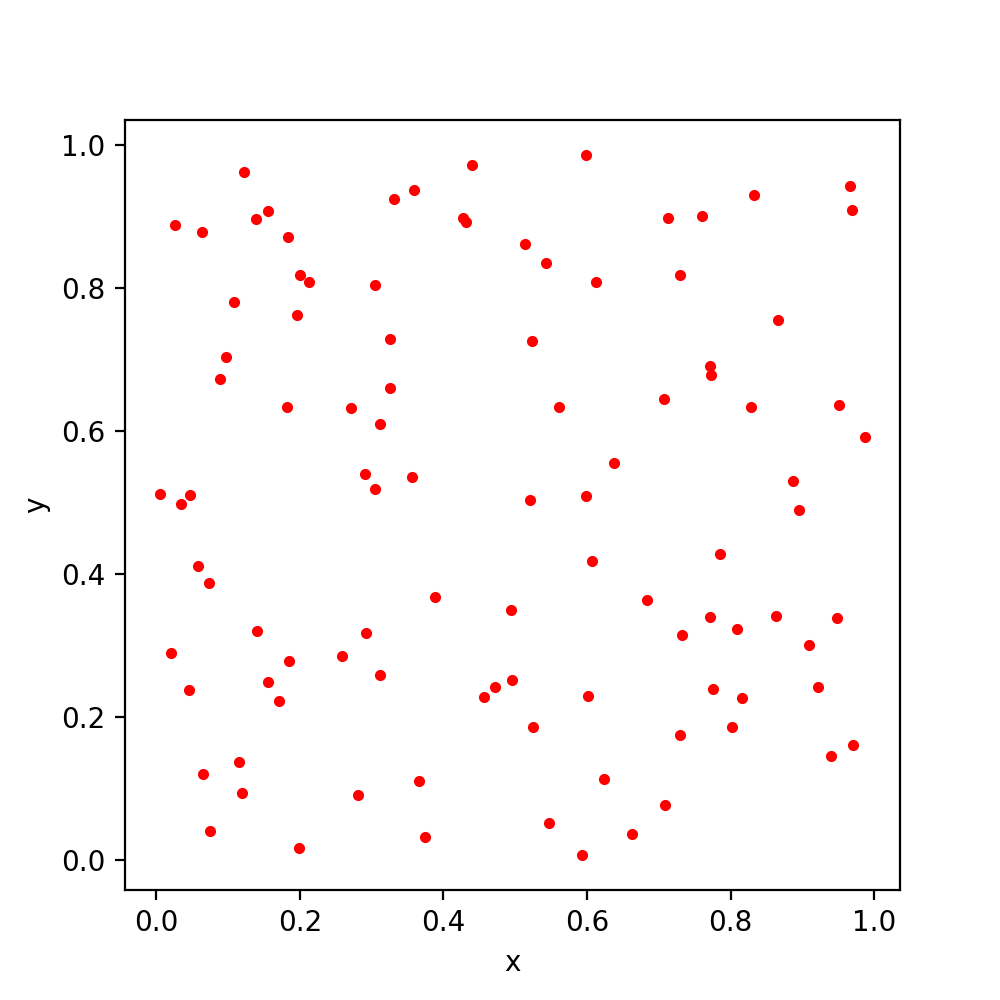

In [3]:
x = np.random.rand(100)
y = np.random.rand(100)

plt.figure()
plt.plot(x,y,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Partícula clásica en una caja bidimensional

Suponga que desea simular el movimiento de una partícula en una caja bidimensional. Para ello utilizaremos las leyes de Newton para integrar su movimiento. La dinámica de la misma dependerá de atributos de la misma, como ser la masa de la misma y de parámetros de la caja, como ser sus dimensiones. 

A su vez, para poder determinar las posiciones en función del tiempo deberemos contar con la posición inicial y la velocidad inicial. Podemos saber donde se encontrará la misma integrando las posición de la misma un diferencial de tiempo posterior.

Defina las siguientes variables: 

1. Tamaño del lado de la caja (L): 10 m
2. masa de la partícula (m): 1.0 kg
3. Posición inicial (x0,y0): (aleatorio, aleatorio) (m, m)
4. Velocidad inicial (vx0, vy0): (aleatorio, aleatorio) (m/s, m/s)
5. diferencial de tiempo (dt): 0.1 (s)

Para la posición tenga en cuenta el tamaño de la caja. Acote la velocidad a no más de +1 o -1 (m/s)

In [4]:
L = 10.0
m = 1.0
V = 5.0
X0 = np.random.rand(1,2)*L - L/2.0
V0 = 2.0*V*(np.random.rand(1,2)-0.5)
dt = 0.1

Usando las leyes de Newton podemos escribir:

$\frac{F}{m} = \frac{d^2x}{dt^2} = a$

La velocidad de la particula a tiempo $t$ puede obtenerse sabiendo la aceleración:

$ v\left(t\right) = v_0 + at$ 

Integrando esta última ecuación, podemos obtener la posición:

$ x\left(t\right) = x_0 + vt $ 

Suponiendo que no hay fuerzas ejerciéndose sobre la partícula, escriba una función (Xt) que devuelva la posición de una partícula en un tiempo (dt) posterior en función de la velocidad inicial (V0):

In [5]:
def Xt(X0,V0,dt):
    X = X0 + V0*dt
    return X

Chequee que la función funciona correctamente. Por ejemplo, vea que si $x_0$ = 10 m, $v_0$ = 1 m/s y dt = 1 s, la posición final es 11 m. Luego, utilice la función generada para mover la partícula 100 pasos:

In [6]:
Xt(10,1,1)

11

<IPython.core.display.Javascript object>


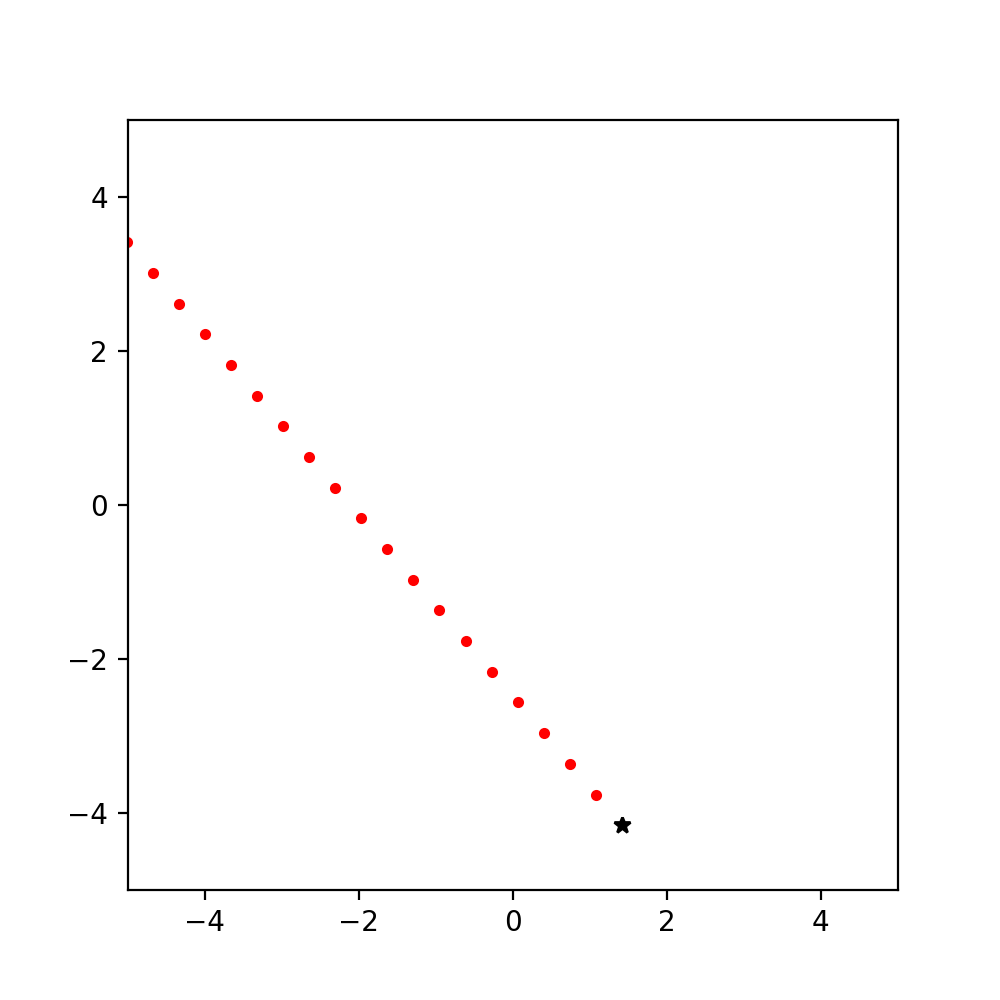

In [7]:
#Crea un objeto figura llamado fig
fig = plt.figure()

#Crea un eje (ax1) en la figura
ax1 = fig.add_subplot(1,1,1)

#Crea un plot en el eje ax1. Dibuja la posición inicial de la partícula como una estrella negra
ax1.plot(X0[:,0],X0[:,1],'k*')

nsteps = 100

#un bucle de nsetps pases que hace lo que está indentado
for i in range(nsteps):
    
    #Calcula la posición en función de x0, v0 y dt
    X = Xt(X0,V0,dt)
    
    #Dibuja la posición actual de la partícula como un punto rojo
    ax1.plot(X[:,0],X[:,1],'r.')
    
    #Ajusta el aspecto de los ejes para que sean simétricos
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    
    #Setea los limites de la figura
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    
    #Actualiza la figura
    fig.canvas.draw()
    
    #Actualiza la posición. La posición calculada se convierte en la
    #posición inicial del próximo paso
    X0 = X

La función anterior mueve la partícula según la velocidad de la misma y la posición inicial. Si la misma estuviese en una caja con paredes rígidas, al chocar debería cambiar de dirección. Reescribamos la ecuación que integra el movimiento teniendo cuenta que al llegar a la pared, choca y cambia direccion. Una posibilidad es asumir choques perfectamente elásticos. Podemos pensar que si al integrar la posición, la misma está por fuera de la caja, debemos mover la partícula adentro y cambiarle el signo a la velocidad que traía. Complete el código a continuación:

In [8]:
def Xt2(X0,V0,dt,L):
    
    #X es un vector de tamaño 2.
    #X[0] es la posición en la coordenada X
    #X[1] es la posición en la coordenada Y
    
    #Nueva posición en función de X0, V0 y dt
    X = X0 + V0*dt
    
    #Dado que la aceleración es 0.0, la velocidad es siempre la misma
    V = V0
    
    #Que pasa si la partícula se fue de la caja en la dimensión x? 
    #La caja está centrada en 0, por lo que va de -L/2 a L/2
    
    #Si la posición en la coordenada X es mayor a L/2, quiere decir que está 
    #fuera de la caja
    if X[0] > L/2:
        #Si está fuera, entonces el excedente de la posición respecto a la pared (X[0] - L/2)
        #hay que restarlo a la posición de la pared: nueva X[0] = L/2 - (X[0] - L/2) = X[0] = L - X[0]
        X[0] = L - X[0]
        #Si la partícula rebotó en la pared, entonces la dirección de la velocidad cambia!
        V[0] = -V[0]
    elif X[0] < -L/2:
        X[0] = -L - X[0]
        V[0] = -V[0]
    
    #Que pasa si la partícula se fue de la caja en la dimensión y?
    if X[1] > L/2:
        X[1] = L - X[1]
        V[1] = -V[1]
    elif X[1] < -L/2:
        X[1] = -L - X[1]
        V[1] = -V[1]   
        
    #Ahora debemos devolver tanto X como V, para poder saber la dirección de la partícula
    return X, V

Testeemos que la función Xt2 hace lo que pedimos que haga. Complete el código a continuación para que la partícula se mueva 500 pasos con un dt de 0.1.

<IPython.core.display.Javascript object>


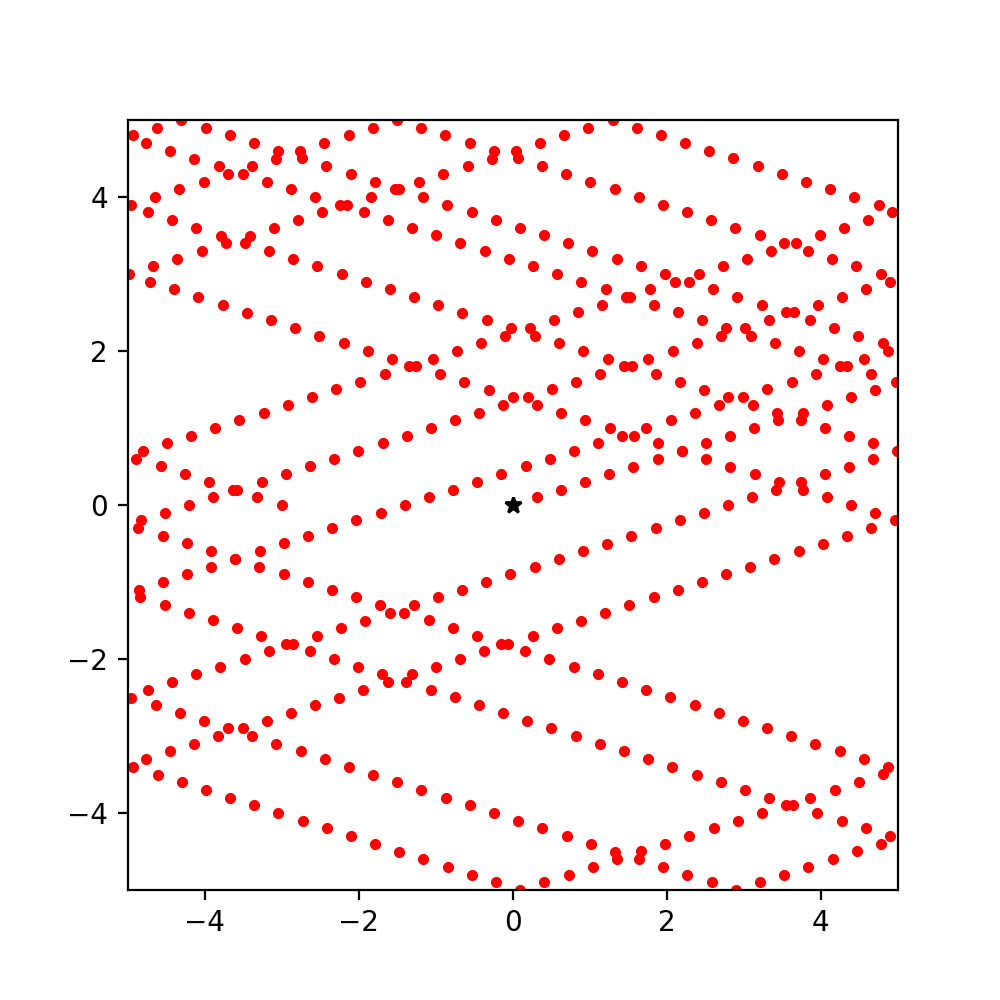

In [9]:
#Inicializamos la partícula en la posición (0.0,0.0) con velocidad (3.14,1.0) y un dt = 0.1
X0 = np.array([0.0,0.0])
V0 = np.array([3.14,1.0])
dt = 0.1

nsteps = 500

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(X0[0],X0[1],'k*')
fig.show()
fig.canvas.draw()

for i in range(nsteps):
    X, V = Xt2(X0,V0,dt,L)
    ax1.plot(X[0],X[1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    fig.canvas.draw()
    
    #Actualizo X y V
    X0 = X
    V0 = V

El algoritmo propuesto para mover la partícula en la caja no permite poner cualquier valor de dt. Por ejemplo, para las condiciones de V0 y L anteriores, un dt = 10 genera problemas (la partícula se va de la caja!). Chequéelo. 
En este caso ¿De qué depende el máximo dt que puede utilizar antes de que su sistema explote? Escríbalo en función de L y V0

## 3. N partículas no interactuantes en una caja bidimensional

Ahora que ya somos capaces de simular una partícula chocando contra las paredes de una caja bidimensional, podemos extenderlo fácilmente a varias partículas que no interactúen. Para ello, simplemente reutilizamos el código, generando coordenadas iniciales y velocidades para dos partículas. Por ejemplo, si queremos simular dos partículas, necesitamos coordenas iniciales y velocidades para las dos:

In [10]:
#N es el número de partículas
N = 2

#X0 son las posiciones inciales. Es una matriz de 2 x 2 (2 partículas x 2 coordenadss).
#Cada partícula es una nueva fila
X0 = np.random.rand(N,2)*L - L/2.0
V = 5.0
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

print('X0')
print(X0)
print('V0')
print(V0)

X0
[[ 1.0642906  -4.90802948]
 [-3.98528457  1.63501769]]
V0
[[-4.94938416 -3.39191949]
 [ 0.48733789  1.91895198]]


Para que el algoritmo de integración de posición funcione con varias partículas, lo reescribimos en Xt3. Si bien la integración puede hacerse fácilmente sumando las matrices de X0 y V0dt (ambas tienen las mismas dimensiones!), con el fin de testear si cada partícula está dentro o fuera de la caja y modificar su posición y velocidad en consecuencia lo hacemos mediante un ciclo sobre el número de partículas (no es estrictamente necesario hacerlo así, pero vamos a hacerlo así para ilustrar lo que está pasando). Eso quiere decir que el algoritmo es lo suficientemente general como para simular N partículas no interactuantes!

In [11]:
def Xt3(X0,V0,dt,L,N):
    
    #Nueva posición, misma velocidad de siempre
    X = X0 + V0*dt
    V = V0
    
    #Para cada partícula, chequeamos si choca con la pared
    for i in range(N):
        if X[i,0] > L/2:
            X[i,0] = L - X[i,0]
            V[i,0] = -V[i,0]
        elif X[i,0] < -L/2:
            X[i,0] = -L - X[i,0]
            V[i,0] = -V[i,0]
    
        if X[i,1] > L/2:
            X[i,1] = L - X[i,1]
            V[i,1] = -V[i,1]
        elif X[i,1] < -L/2:
            X[i,1] = -L - X[i,1]
            V[i,1] = -V[i,1]   
    return X, V

Testeemos el algoritmo para muchas N = 10 partículas. Simule el sistema durante 500 pasos, una caja de lado 10, un dt = 0.01

<IPython.core.display.Javascript object>


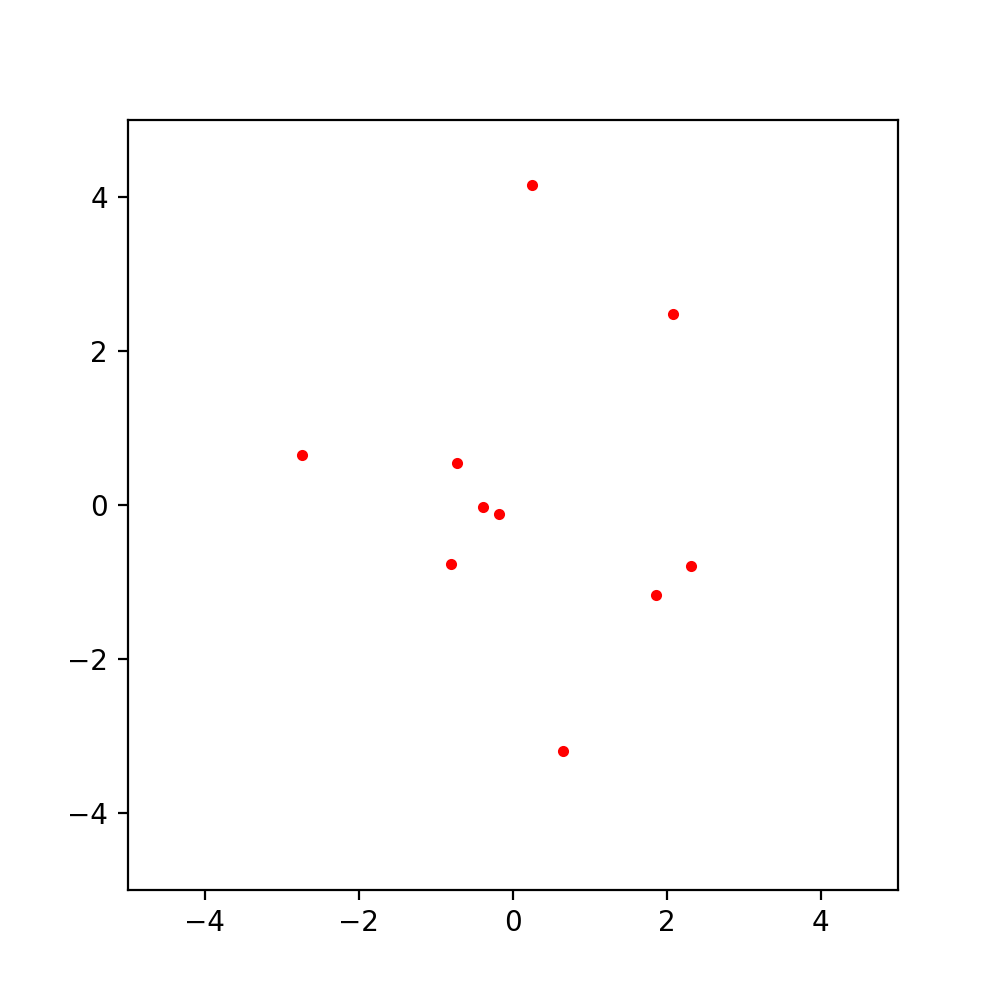

In [13]:
nsteps = 500
N = 10
V = 5
L = 10
dt = 0.01

#Condiciones iniciales
X0 = np.random.rand(N,2)*L - L/2.0
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(X0[:,0],X0[:,1],'k*')
fig.show()
fig.canvas.draw()

for i in range(nsteps):
    #Calculo posiciones y velocidades
    X, V = Xt3(X0,V0,dt,L,N)
    
    #Actualizo gráfico
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    fig.canvas.draw()
    
    #Las nuevas posiciones pasan a ser las posiciones iniciales del próximo paso
    #Idem para las velocidades
    X0 = X
    V0 = V

## 4. Potencial Armónico

¿Cómo podemos agregar la interacción entre las partículas? Podemos hacerlo de muchas maneras distintas. La interacción entre las mismas va a depender del potencial entre ellas. Por ejemplo, podríamos proponer que entre dos partículas, la energía potencial dependiera del cuadrado de la distancia:


<center>
$U(r) = \frac{k}{2} \left(r - r_0 \right)^2 $
</center>

Este potencial es el llamado armónico y es el modelo para un resorte a estiramientos pequeños y es usado, por ejemplo, para modelar enlaces en moléculas. 

Construya una función pot_arm, que dada la constante del resorte (k), la distancia de equilibrio (r0) y la distancia entre las partículas devuelva la energía del sistema:

In [14]:
def pot_arm(k,r,r0):
    return 0.5*k*(r-r0)**2

Construya un gráfico que muestre la energía potencial del sistema en función de la distancia de las dos partículas:

<IPython.core.display.Javascript object>


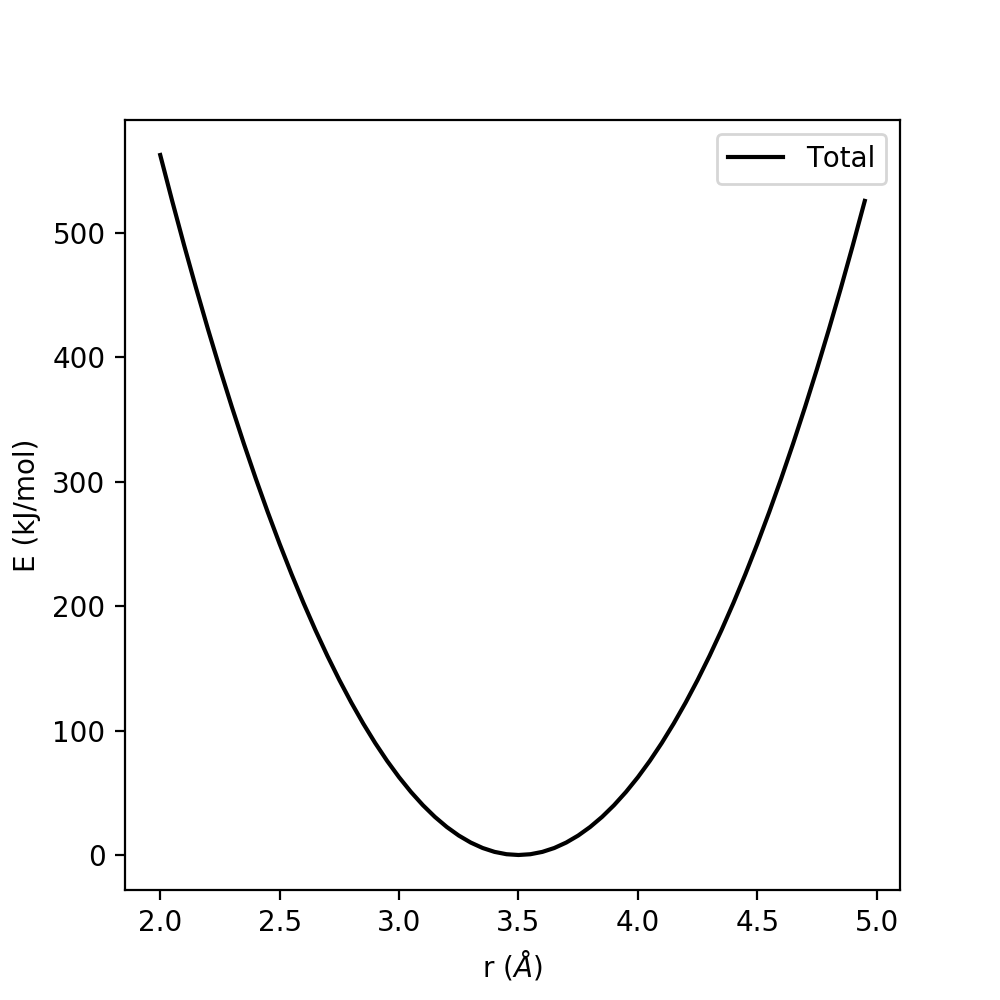

In [15]:
k = 500
r0 = 3.5

r = np.arange(2.0,5.0,0.05)
total = pot_arm(k,r,r0)
fig = plt.figure()
plt.plot(r,total,'k',label = 'Total')
plt.xlabel('r ($\AA$)')
plt.ylabel('E (kJ/mol)')
plt.legend()
plt.show()

Para poder utilzar este potencial en una simulación, necesitamos calcular la fuerza que experimenta cada partícula en función de la posición. Eso significa que en vez de la energía potencial, necesitamos la fuerza. La fuerza y la energía potencial se relacionan a través de la siguiente igualdad:

$F_x = -\frac{dU}{dx}$

Escriba una función para calcular la fuerza entre dos partículas sometidas a un potencial armónico. Complete la función propuesta de forma que dada la constante del resorte, la distancia de equilibrio y la posición de las partículas, devuelva la fuerza que siente cada partícula.

In [16]:
#Calculo de fuerza usando un potencial armonico
def force_arm(N,k,X,r0):
    
    #Inicializo la Energia y las fueras a 0.0
    Epot = 0.0
    F = np.zeros(X.shape)
    
    #Me fijo para todas las combinaciones de partículas
    #Evitando contando dos veces cada par y la interaccion sobre si misma
    for i in range(N-1):
        for j in range(i+1,N):
            rx = X[j,0] - X[i,0]
            ry = X[j,1] - X[i,1]
            r = np.sqrt(rx**2 +ry**2)
            fx = k*(r-r0)*rx/r
            fy = k*(r-r0)*ry/r
            
            Epot = Epot + 0.5*k*(r-r0)**2
    
            F[i,0] = F[i,0] + fx
            F[j,0] = F[j,0] - fx
            F[i,1] = F[i,1] + fy
            F[j,1] = F[j,1] - fy
    
    return F, Epot

Ahora podemos utilizar este potencial para testear la dinámica de dos partículas en una caja bidimensional. A diferencia de lo que hicimos hasta ahora, para actualizar las posiciones utilizaremos las fuerzas. Una de las formas de hacer esto es mediante el algoritmo de Verlet. Para ello, las nuevas posiciones se calculan de la siguiente forma:

$X_{t+1} = 2X_t - X_{t-1} + F_t \Delta t^2 + \mathcal{O}\left(\Delta t^4\right)$

En otras palabras, la nueva posición depende de la posición actual, la posición anterior y la fuerza que experimenta la partícula. Interesantemente, la posición no depende de la velocidad, por lo que en principio no es necesario computarla. Sin embargo, dado que la velocidad de las partículas da cuenta de la energía cinética del sistema, es útil hacerlo. En este caso, se puede hacer de la siguiente manera:

$V_{t+1} = \frac{X_{t+1} - X_{t-1}}{2 \Delta t}$

Nuevamente, dado que tenemos a nuestras partículas dentro de una caja, deberemos testear si las nuevas posiciones deben ser modificadas o no al chocar con las paredes. Usando el script a continuación, estudie el efecto de la constante de fuerza y la posición de equilibrio en la dinámica. Para su comodidad, además de la dinámica puede observar la evolución de la energía cinética, potencial y total del sistema. Para comenzar, analice el sistema para dos partículas (por ejemplo, N = 2; L = 3.0; V = 0.5; k = 25; r0 = 1; dt = 0.01). Cuando finalice, repita los mismos parámetros pero usando N = 49 partículas y k = 1. Por último, descomente la sección que dice "DESCOMENTAME!" (para ello, comente las """ al principio y al final del bloque), y vuelva a ejecutar el código. A diferencia del último caso, las 49 partículas estarán dispuestas homogéneamente en el centro de una caja de 10x10.

<IPython.core.display.Javascript object>


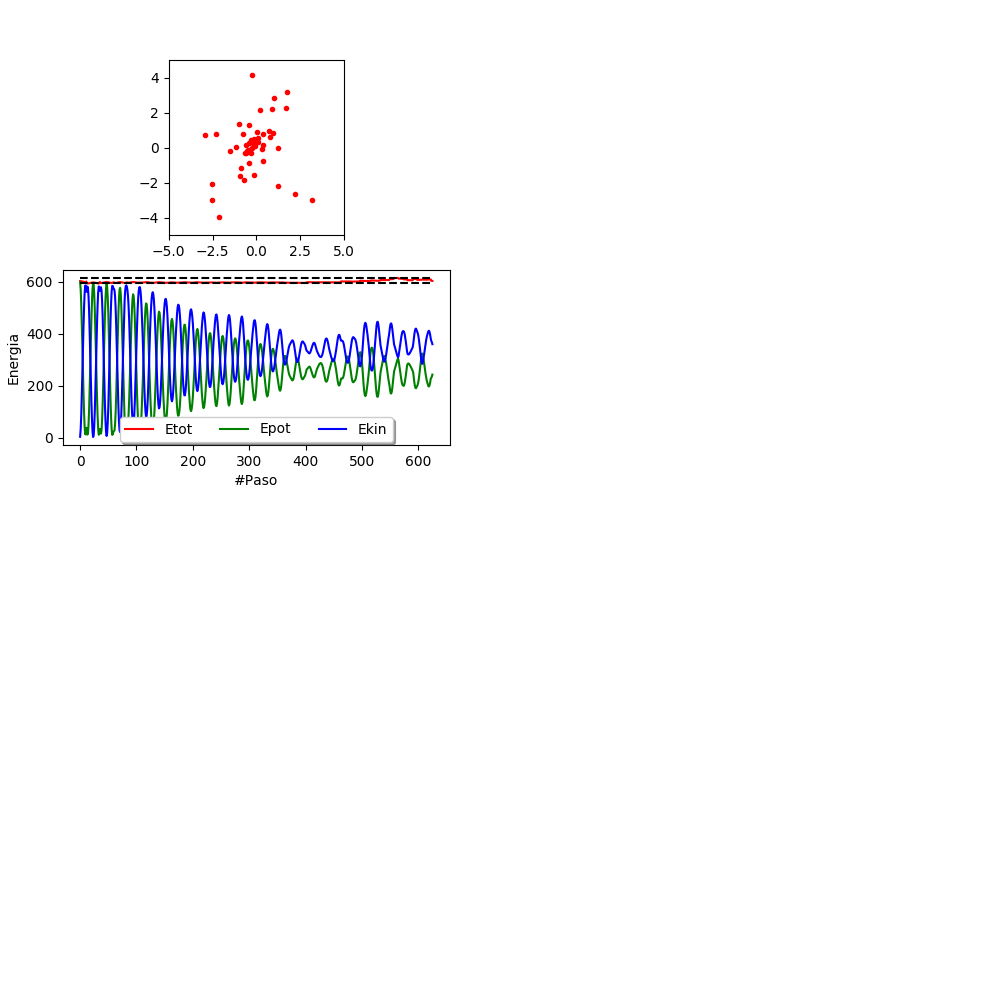

In [ ]:
np.random.seed(42)

N = 2
L = 3.0
X = np.random.rand(N,2)*L - L/2.0
V = 0.5
k = 25
r0 = 1
dt = 0.01
nsteps = 1000
#L = 10
# DESCOMENTAME! #############################
#"""
N = 49
L = 7.0
X = L*np.array([[ 0.07142857,  0.5       ],
       [ 0.21428571,  0.07142857],
       [ 0.92857143,  0.92857143],
       [ 0.35714286,  0.21428571],
       [ 0.07142857,  0.92857143],
       [ 0.07142857,  0.35714286],
       [ 0.21428571,  0.92857143],
       [ 0.92857143,  0.21428571],
       [ 0.35714286,  0.64285714],
       [ 0.35714286,  0.92857143],
       [ 0.21428571,  0.64285714],

       [ 0.92857143,  0.07142857],
       [ 0.78571429,  0.21428571],
       [ 0.92857143,  0.35714286],
       [ 0.64285714,  0.5       ],
       [ 0.5       ,  0.64285714],
       [ 0.21428571,  0.5       ],
       [ 0.92857143,  0.5       ],
       [ 0.35714286,  0.07142857],
       [ 0.78571429,  0.64285714],
       [ 0.64285714,  0.78571429],
       [ 0.5       ,  0.07142857],
       [ 0.07142857,  0.07142857],
       [ 0.64285714,  0.35714286],
       [ 0.5       ,  0.21428571],
       [ 0.78571429,  0.35714286],
       [ 0.78571429,  0.5       ],
       [ 0.92857143,  0.64285714],
       [ 0.92857143,  0.78571429],
       [ 0.64285714,  0.21428571],
       [ 0.5       ,  0.35714286],
       [ 0.21428571,  0.35714286],
       [ 0.07142857,  0.21428571],
       [ 0.5       ,  0.5       ],
       [ 0.07142857,  0.64285714],
       [ 0.35714286,  0.5       ],
       [ 0.07142857,  0.78571429],
       [ 0.64285714,  0.92857143],
       [ 0.78571429,  0.92857143],
       [ 0.64285714,  0.07142857],
       [ 0.5       ,  0.92857143],
       [ 0.21428571,  0.78571429],
       [ 0.35714286,  0.78571429],
       [ 0.64285714,  0.64285714],
       [ 0.21428571,  0.21428571],
       [ 0.35714286,  0.35714286],
       [ 0.5       ,  0.78571429],
       [ 0.78571429,  0.07142857],
       [ 0.78571429,  0.78571429]]) - L/2.0
V = 1
k = 5.0
r0 = 1.0
dt = 0.01
L = 10 
#"""
#######################################################

#Velocidad inicial
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

#Calculo la energia cinetica y la guardo en una lista
Ekin = 0.5*sum(np.sum(V0**2, axis = 1))
Ekin_list = [Ekin/N]

#Construyo una posición en t-1 usando la velocidad
X0 = X - V0*dt

#Fuerza inicial y energia potencial inicial
F, Epot = force_arm(N, k, X, r0)
Epot_list = [Epot/N]

def integrate(N,X0,X,F,L,dt):

    #inicializo energia 
    Ekin = 0.0
    
    #Calculo la nueva posicion y la nueva velocidad de todas las particulas
    Xnew = 2.0*X - X0 + F*dt**2
    Vnew = (Xnew - X0)/(2.0*dt)
    
    #Para cada particula chequeo si choca con las paredes
    for i in range(N):
        if Xnew[i,0] > L/2:
            Xnew[i,0] = L - Xnew[i,0]
            Vnew[i,0] = -Vnew[i,0]           
            #Si choco, entonces muevo la posicion anterior de forma de mantener 
            #el modulo de la energia cinetica y conservar la energia
            X[i,0] = L - X[i,0]
            
        if Xnew[i,0] < -L/2:
            Xnew[i,0] = -L - Xnew[i,0]
            Vnew[i,0] = -Vnew[i,0]
            #Muevo para conservar la energia
            X[i,0] = -L - X[i,0]
    
        if Xnew[i,1] > L/2:
            Xnew[i,1] = L - Xnew[i,1]
            Vnew[i,1] = -Vnew[i,1]
            #Muevo para conservar la energia
            X[i,1] = L - X[i,1]
            
        if Xnew[i,1] < -L/2:
            Xnew[i,1] = -L - Xnew[i,1]
            Vnew[i,1] = -Vnew[i,1]   
            #Muevo para conservar la energia
            X[i,1] = -L - X[i,1]
        
        #Acumulo la energia cinetica de cada particula
        Ekin = Ekin + 0.5*(Vnew[i,0]**2 + Vnew[i,1]**2)
    return Xnew, X, Ekin

#Inicializo figura
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(2,1,2)
fig.canvas.draw()

#calculo la energia total por particula.
Etot_list = [(Ekin + Epot)/N]
min_Etot = 1e6
max_Etot = 0.0

for i in range(nsteps):
    
    #Calculo la fuerza y la Epot
    F, Epot = force_arm(N,k,X,r0)
    
    #agrego la E potencial por particula a la lista
    Epot_list.append(Epot/N)
    
    #Integro posiciones y calculo la Ekin
    Xnew, X, Ekin = integrate(N,X0,X,F,L,dt)
    
    #agrego la E cinetica por particula a la lista
    Ekin_list.append(Ekin/N)
    
    #Actualizo posiciones
    X0 = copy(X)
    X = copy(Xnew)
    
    #grafico posiciones
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-float(L/2),float(L/2)])
    ax1.set_ylim([-float(L/2),float(L/2)])
    
    #Calculo la Etot por particula
    Etot = Epot_list[-1] + Ekin_list[-1] 
    Etot_list.append(Etot)
    
    #Busco la menor y mayor energia total y las guardo en min_Etot y max_Etot
    min_Etot = min(min_Etot, Etot)
    max_Etot = max(max_Etot, Etot)
    
    #Grafico las energias del sistema
    ax3.clear()
    ax3.plot(Etot,'r')
    ax3.plot(np.array(Etot_list[1:]),'r',label = 'Etot')
    ax3.plot(np.array(Epot_list[1:]),'g',label = 'Epot')
    ax3.plot(np.array(Ekin_list[1:]),'b',label = 'Ekin')
    
    #Rango de la energia total
    ax3.plot(i*[min_Etot],'k--')
    ax3.plot(i*[max_Etot],'k--')
    
    ax3.set_ylabel('Energia')
    ax3.set_xlabel('#Paso')
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),
          ncol=3, fancybox=True, shadow=True)
    fig.canvas.draw()


Dado que el potencial como está escrito es atractivo, las partículas deberían oscilar alrededor de la posición de equilibrio. ¿Qué pasaría si k = 0?¿Y si k < 0?

## 5. Condiciones periódicas de contorno

A diferencia de lo que hemos hecho hasta ahora, en vez de realizar simulaciones en una caja de dimensiones finitas en las que las partículas chocan, usaremos una caja infinita. Para esto, nos valdremos de una técnica conocida como Condiciones Periódicas de Contorno (Periodic Boundary Conditions en inglés). Esta técnica se basa en simular una caja finita rodeada por cajas similares en cada uno de sus límites. Si una partícula sale por uno de los lados, se coloca una partícula similar en el lado opuesto de la caja.

Cuando trabajamos con una caja finita en la que las partículas chocan contra las paredes, las partículas en las inmediaciones de las paredes tienen entornos distintos a las partículas en el seno de la caja. Al usar condiciones periódicas todas las partículas tienen entornos más parecidos, ya que cada partícula interactuará con partículas de su caja o con las imágenes más cercanas de cajas contiguas.

Antes de pasar a un potencial mas realista, incorporemos las condiciones periódicas al conjunto de partículas armónicas para entender su funcionamiento. A continuación el potencial armónico con PBC.

In [18]:
#Calculo de fuerza usando un potencial armonico
def force_arm_PBC(N,k,X,r0,box):
    Epot = 0.0
    F = np.zeros(X.shape)
    #r_list = np.zeros(N*(N-1)/2)
    #w = 0
    for i in range(N-1):
        for j in range(i+1,N):
            rx = X[j,0] - X[i,0]
            ry = X[j,1] - X[i,1]
            
            
            #### PBC ########################################################## 
            #Corrijo la distancia, buscando la particula (o imagen) mas cercana
            rx = rx - box*np.rint(rx/box)
            ry = ry - box*np.rint(ry/box)
            ###################################################################
            
            r = np.sqrt(rx**2 +ry**2)
            #r_list[w] = r
            #w = w +1
            fx = k*(r-r0)*rx/r
            fy = k*(r-r0)*ry/r
            
            Epot = Epot +0.5*k*(r-r0)**2
    
            F[i,0] = F[i,0] + fx
            F[j,0] = F[j,0] -fx
            F[i,1] = F[i,1] + fy
            F[j,1] = F[j,1] -fy
    
    #return F, Epot, r_list
    return F, Epot

Con el fin de inicializar el sistema en condiciones más homogéneas para que relaje más rápida y felizmente, creamos una función que distribuye las partículas en la caja de forma simétrica, adicionandole una pequeña cantidad de aleatoriedad.

In [19]:
def lattice_pos(npart,r):
    """
    Distribuye homogeneamente npart particulas en una celda
    de 1x1 entre 0 y 1, agregando un r/100% de aleatoriedad. 
    Devuelve un np.array de npart de posiciones x 2 coordenadas

    """

    #Calculo cantidad de celdas por lado
    n = int(np.ceil(np.sqrt(npart)))
    
    #calculo el centro de la celda
    nf = 1.0/float(n)
    
    #Calculo las posiciones de todas las celdas disponibles agregando un r% de randomizacion
    #r = 0.02
    celdas = [[i*nf +0.5*nf + r*np.random.rand(),j*nf + 0.5*nf+ r*np.random.rand()]
              for i in range(n) for j in range(n)]
    
    #Mezclo las posiciones de las celdas
    np.random.shuffle(celdas)
    
    X = np.array(celdas[0:npart])
    return X

Utilice el código a continuación para realizar una simulación de 49 partículas interactuando con potenciales armónicos en condiciones periódicas (utilice una caja de L = 7.0). Esta misma geometría es la que utilizó en el caso de los 49 osciladores armónicos en la caja. Observe la dinámica de las partículas y comparelos con lo que veía en la caja. 

<IPython.core.display.Javascript object>


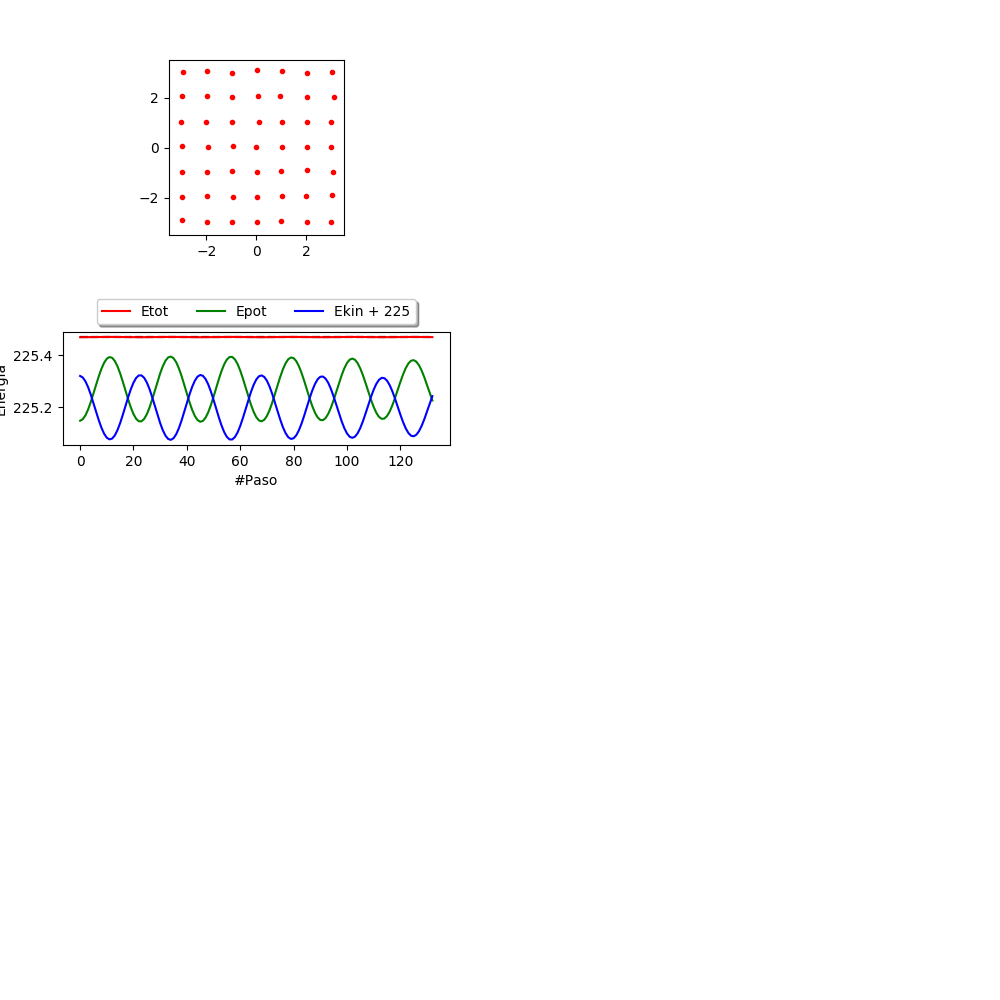

KeyboardInterrupt: 

In [20]:
np.random.seed(42)

N = 49
L = 7.0

#X = np.random.rand(N,2)*L - L/2.0
X = lattice_pos(N,0.01)*L - L/2.0

V = 1
k = 5.0
r0 = 1.0
dt = 0.01
nsteps = 500
#L = 20

V0 = 2.0*V*(np.random.rand(N,2)-0.5)

#Calculo la velocidad del centro de masa y se la resto para que el sistema no se mueva
V0 = V0 - np.tile(np.mean(V0, axis = 0),(N,1));

Ekin = 0.5*sum(np.sum(V0**2, axis = 1))
Ekin_list = [Ekin/N]

#Construyo una posición en t-1 usando la velocidad
X0 = X - V0*dt

#Fuerza inicial
#F, Epot, r = force_arm(N, k, X, r0)
F, Epot = force_arm_PBC(N, k, X, r0, L)
Epot_list = [Epot/N]
#r_list = [r]

def integrate(N,X0,X,F,L,dt):
    Ekin = 0.0
    #Xnew = 2.0*X - X0 + F*dt**2
    Xnew = np.zeros(X0.shape)
    Vnew = np.zeros(X0.shape)
    
    for i in range(N):
        Xnew[i,0] = 2.0*X[i,0] - X0[i,0] + F[i,0]*dt**2
        rx = X[i,0] - X0[i,0]
        rx = rx - L*np.rint(rx/L)
        v1 = rx/dt
        rx = Xnew[i,0] - X[i,0]
        rx = rx - L*np.rint(rx/L)
        v2 = rx/dt 
        Vnew[i,0] = 0.5*(v1+v2)
        
        if Xnew[i,0] > L/2:
            Xnew[i,0] = Xnew[i,0] - L
                  
        if Xnew[i,0] < -L/2:
            Xnew[i,0] = L + Xnew[i,0]
        
        Xnew[i,1] = 2.0*X[i,1] - X0[i,1] + F[i,1]*dt**2
        ry = X[i,1] - X0[i,1]
        ry = ry - L*np.rint(ry/L)
        v1 = ry/dt
        ry = Xnew[i,1] - X[i,1]
        ry = ry - L*np.rint(ry/L)
        v2 = ry/dt 
        Vnew[i,1] = 0.5*(v1+v2) 
        
        if Xnew[i,1] > L/2:
            Xnew[i,1] = Xnew[i,1] - L
            
        if Xnew[i,1] < -L/2:
            Xnew[i,1] = L + Xnew[i,1]
        
        Ekin = Ekin + 0.5*(Vnew[i,0]**2 + Vnew[i,1]**2)
    return Xnew, X, Ekin

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(3,1,3)
ax1.plot(X0[:,0],X0[:,1],'k*')
fig.show()
fig.canvas.draw()

Etot_list = [(Ekin + Epot)/N]
min_Etot = 1e6
max_Etot = 0.0
for i in range(nsteps):
    
    #Calculo la fuerza y la Epot
    #F, Epot, r = force_arm(N,k,X,r0)
    F, Epot = force_arm_PBC(N, k, X, r0, L)

    Epot_list.append(Epot/N)
    
    #Integro posiciones y calculo la Ekin
    Xnew, X, Ekin = integrate(N,X0,X,F,L,dt)
    Ekin_list.append(Ekin/N)
    
    #Actualizo posiciones
    X0 = copy(X)
    X = copy(Xnew)
    
    #r_list.append(r)
    
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    
    #ax2.clear()
    #ax2.plot(r_list,'r')
    #ax2.plot(i*[r0],'k--')
    #ax2.set_ylabel('Distancia')
    #ax2.set_xlabel('#Paso')
    
    ax3.clear()
    Etot = (Ekin+Epot)/N
    Etot_list.append(Etot)
    min_Etot = min(min_Etot, Etot)
    max_Etot = max(max_Etot, Etot)
    ax3.plot(i*[min_Etot],'k--')
    ax3.plot(i*[max_Etot],'k--')
    ax3.plot(np.array(Etot_list[1:]),'r',label = 'Etot')
    ax3.plot((np.array(Epot_list[1:])),'g',label = 'Epot')
    ax3.plot(np.array(Ekin_list[1:])+225,'b',label = 'Ekin + 225')
    ax3.set_ylabel('Energia')
    ax3.set_xlabel('#Paso')
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3, fancybox=True, shadow=True)
    fig.canvas.draw()

## 5. Potencial de Lennard-Jones

Un potencial más realista que el armónico para simular partículas, átomos o moléculas es el potencial de Lennard-Jones. Este potencial es un potencial de interacción de a pares que tiene una parte atractiva y una parte repulsiva:

<center>
$U(r) = 4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12} -\left(\frac{\sigma}{r}\right)^{6}\right] $
</center>

Como puede observarse, la energía depende de la distancia. A distancias cortas, el potencial dominante es fuertemente repulsivo, para evitar que las partículas se encuentren en el mismo espacio. A largas distancias, el potencial es atractivo. Complete a continuación la función LJ, que calcula la energía de interacción de un par de partículas a través del potencial de Lennard-Jones en función de la distancia entre las mismas. Utilicelo para graficar el mismo a continuación.

<IPython.core.display.Javascript object>


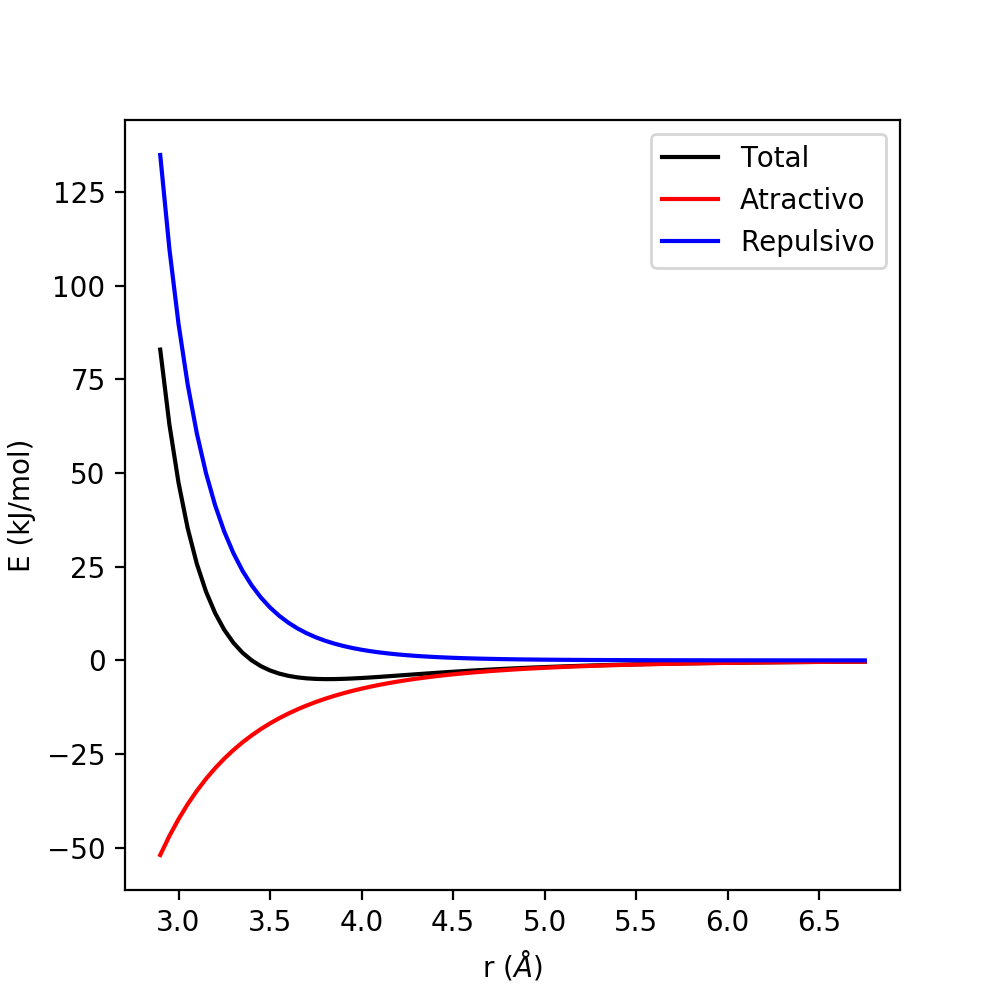

In [21]:
def LJ(r,sigma,epsilon):
    repulsivo = 4*epsilon*(sigma/r)**12
    atractivo = -4*epsilon*(sigma/r)**6
    total = atractivo + repulsivo
    
    return total, atractivo, repulsivo

epsilon = 5
sigma = 3.4

r = np.arange(sigma - 0.5,2*sigma,0.05)
total, atractivo, repulsivo = LJ(r,sigma, epsilon)
fig = plt.figure()
plt.plot(r,total,'k',label = 'Total')
plt.plot(r,atractivo,'r',label = 'Atractivo')
plt.plot(r,repulsivo,'b',label = 'Repulsivo')
plt.xlabel('r ($\AA$)')
plt.ylabel('E (kJ/mol)')
plt.legend()

plt.show()

Para evitar el pasaje constante de unidades durante el cómputo en la dinámica (y para minimizar los problemas numéricos provenientes de utilizar números muy chiquitos o grandes), se suele "reducir" las magnitudes. Para el caso del potencial de LJ:

- Unidad de Energía: $\epsilon$
- Unidad de Distancia: $\sigma$
- Unidad de masa: m (masa de la partícula) en unidades atómicas amu

Con estas unidades básicas, se pueden derivar:

- Unidad de tiempo: $\sigma \sqrt{\frac{m}{\epsilon}}$

- Unidad de temperatura: $\frac{\epsilon}{k_B}$

Por lo tanto, la forma reducida del potencial de LJ es:

<center>
$U^*(r^*) = 4\left[\left(\frac{1}{r^*}\right)^{12} -\left(\frac{1}{r^*}\right)^{6}\right] $
</center>

donde el asterisco hace referencia a que la magnitud se encuentra en unidades reducidas.

Utilizando este potencial podríamos reescribir la simulación de muchas partículas. Nuevamente, si estamos interesados en utilizar el algoritmo de Verlet para integrar las ecuaciones de movimiento, necesitamos escribir las fuerzas a partir del potencial. Como somos muy buenos, ya les dimos la siguiente función que calcula la fuerza sobre cada átomo en coordenadas reducidas. 

In [22]:
def force(npart,X,rcut,box,epsilon):

    #inicializo las fuerzas a 0.0 y la energia a 0.0
    F = np.zeros((npart,2),dtype=np.float)
    Epot = 0.0
    
    #Calculo la energia de cutoff en unidades reducidas
    rci6 = 1.0/rcut**6
    rci12= rci6**2
    Ecut = 4.0*(rci12 -rci6)
    
    #Calculo la fuerza sobre todos los pares de particulas
    for i in range(npart-1):
        for j in range(i+1,npart):
            rx = X[i,0] - X[j,0]
            rx = rx - box*np.rint(rx/box)
            ry = X[i,1] - X[j,1]
            ry = ry - box*np.rint(ry/box)
            r2 = rx**2 + ry**2
            
            if r2 < rcut**2:
                r2i = 1/r2
                r6i = r2i**3
                ff = 48.0*r2i*r6i*(r6i-0.5)
                
                # F tiene unidades de reducidas
                F[i,0] = F[i,0] + ff*rx
                F[j,0] = F[j,0] - ff*rx

                F[i,1] = F[i,1] + ff*ry
                F[j,1] = F[j,1] - ff*ry

                Epot = Epot + 4.0*r6i*(r6i-1.0) - Ecut
                
    return [F,Epot*epsilon] #Fuerza en unidades reducidas y energia en kJ/mol


Si leyó el código anterior, debería preguntarse qué es rcut. Este parámetro es usado para decidir hasta que distancia entre partículas se calcula la interacción, con la intención de disminuir el costo del cálculo computacional. Esto se usa si la interacción cae más rápido que $r^{-3}$ en 3D (interacciones de corto alcance). Al usar esta aproximación, hay que agregar una corrección a la energía. En nuestro caso se agrega el término Ecut. Lamentablemente, esta aproximación no es válida para interacciones de Coulomb ni dipolares. En los casos en los que tuviese que calcular estas interacciones explícitamente, otras metodologías pueden ser utilizadas.

A continuación puede encontrar el código para integrar las ecuaciones de movimiento usando las fuerzas de LJ en PBC.

In [23]:
def integrate(npart,X0,X,F,dt,Epot,box,m):
    
    Xnew = np.zeros((npart,2), dtype = float)
    Vnew = np.zeros((npart,2), dtype = float)
    V1 = np.zeros((npart,2), dtype = float)
    V2 = np.zeros((npart,2), dtype = float)
    
    Xnew = 2.0*X - X0 + (F/m)*dt**2

    rx1= X[:,0] - X0[:,0]
    rx1 = rx1 - box*np.rint(rx1/box)
    V1[:,0]= rx1/dt
    rx2= Xnew[:,0] - X[:,0]
    rx2 = rx2 - box*np.rint(rx2/box)
    V2[:,0]=rx2/dt 
    Vnew[:,0] = 0.5*(V1[:,0]+V2[:,0]) 
    
    #Chequeo posición en X
    Xnew[:,0] = np.where(Xnew[:,0] > box, Xnew[:,0] - box, Xnew[:,0])
    Xnew[:,0] = np.where(Xnew[:,0] < 0.0, box + Xnew[:,0], Xnew[:,0])

    #Calculo nueva velocidad en Y
    ry1= X[:,1] - X0[:,1]
    ry1 = ry1 - box*np.rint(ry1/box)
    ry2= Xnew[:,1] - X[:,1]
    ry2 = ry2 - box*np.rint(ry2/box)
    Vnew[:,1] = 0.5*(ry1+ry2)/dt 
    
    #Chequeo posición en Y
    Xnew[:,1] = np.where(Xnew[:,1] > box, Xnew[:,1] - box, Xnew[:,1])
    Xnew[:,1] = np.where(Xnew[:,1] < 0.0, box + Xnew[:,1], Xnew[:,1])
    
    #Calculamos la velocidad cuadratica media
    V2 = sum(sum(Vnew**2))
    T = V2/(2*npart)
    
    Ekin = 0.5*V2*epsilon
    Etot = Epot + Ekin
    
    return [Xnew,T,Etot,Epot,Ekin,Vnew] #Sale Xnew en reducidas

La función ini inicializa una corrida, generando posiciones con lattice_pos y velocidades con vel_ini

In [24]:
def vel_ini(npart,temp_red):
    """
    Asigna velocidades al azar de la distribucion uniforme en el rango -0.5 a 0.5

    """
    V = np.random.rand(npart,2)-0.5*np.ones((npart,2), dtype=np.float)
    
    #Calculamos la velocidad del centro de masa
    Vx = sum(V[:,0])/npart
    Vy = sum(V[:,1])/npart
    
    #Calculamos la velocidad cuadratica media
    V2 = sum(sum(V**2))/npart
    
    #Factor de escala para temperatura
    fs = np.sqrt(2*temp_red/V2)
    
    #Elimino la velocidad del centro de masa y escalo
    V[:,0] = (V[:,0] - Vx)*fs
    V[:,1] = (V[:,1] - Vy)*fs
    
    return V

def init(npart,box,temp_red,dt_red,sigma):
    r = 0.00
    X = lattice_pos(npart,r)
    
    #Escalo posiciones al tamanio de caja y lo reduzco con sigma
    X = (X*box)/sigma
    V = vel_ini(npart,temp_red) 
    
    #Genero posicion previa
    X0 = X - V *dt_red
    
    return [X,V,X0]

In [27]:
#Condiciones de la corrida
nsteps = 1000
npart  = 144
box = 40
temp0 = 119.8 #K
dt = 1e-14 # en segundos 
rcut = box/2.0 # A (unidades reales)
kB = 1.381e-23 # J/K
sigma = 3.405 #A
epsilon = 0.996 #kJ/mol
m = 39.95 #g/mol

#reduzco el tiempo
t_unit = (sigma*1e-10) * np.sqrt(m*1e-3/(1000*epsilon))
dt_red = dt/t_unit

#reduzco la temperatura
temp_unit = 1.0/(kB/(1000*epsilon/6.02e23))
temp_red = temp0/temp_unit

#reduzco la masa
m_unit = m*1e-3/6.02e23
m = 1

#inicializo posiciones y velocidades
X, V, X0 = init(npart,box,temp_red,dt_red,sigma)

#Inicializo vector donde guardare informacion como E y T
output = np.zeros((nsteps,5))

Una vez inicializados los parámetros, podemos ejecutar la corrida:

<IPython.core.display.Javascript object>


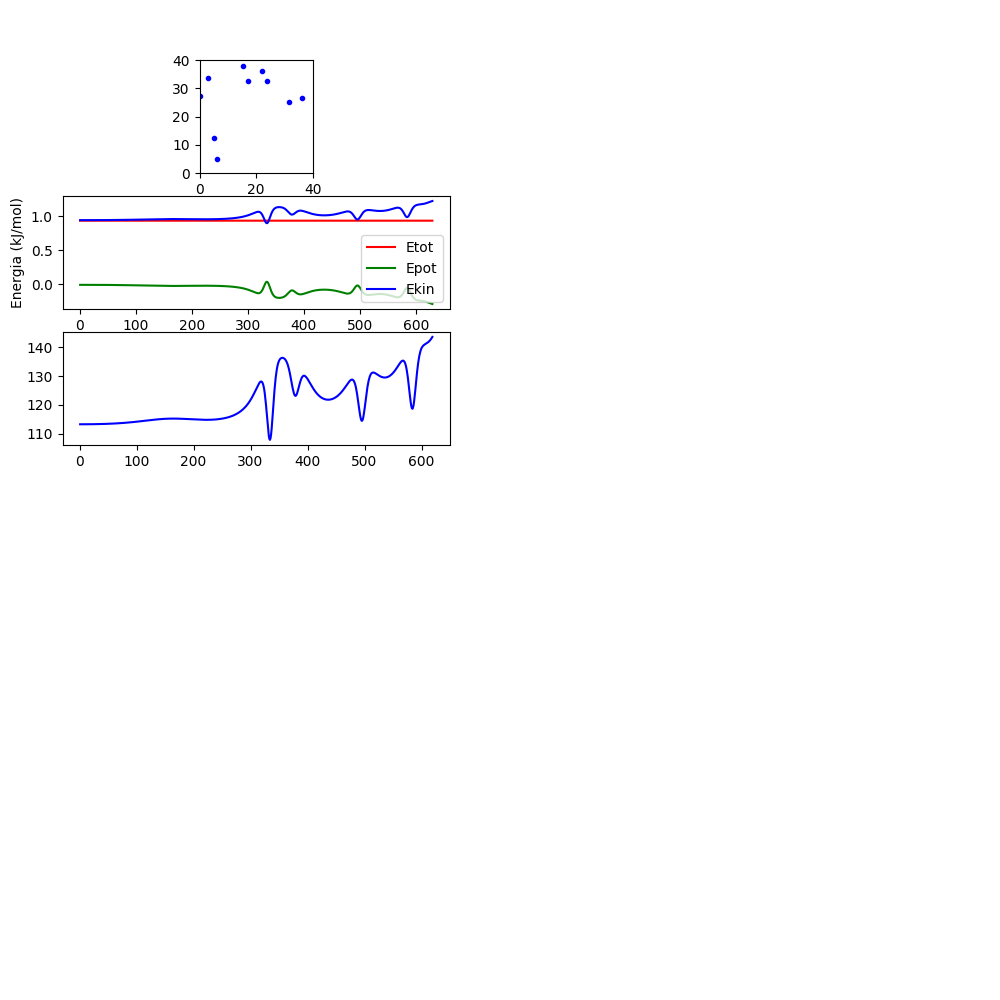

KeyboardInterrupt: 

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
fig.show()
fig.canvas.draw()     

for i in range(nsteps):
    #Calculo fuerzas
    F,E = force(npart,X,rcut/sigma,box/sigma,epsilon)

    #Integro
    Xnew,T,Etot,Epot,Ekin,Vnew = integrate(npart,X0,X,F,dt_red,E,box/sigma,m)

    output[i,0]= i
    output[i,1]= T
    output[i,2]= Etot
    output[i,3]= Epot
    output[i,4]= Ekin

    #Actualizo posiciones
    X0 = copy(X)
    X = copy(Xnew)
    
    #Grafica da 100 pasos
    if i % 10 == 0:
        #Grafico posiciones
        ax1.clear()
        ax1.plot(X[:,0]*sigma,X[:,1]*sigma,'b.')
        ax1.axis('equal')
        ax1.set_aspect('equal', 'box')
        ax1.set_xlim(0,box)
        ax1.set_ylim(0,box)
        
        #Grafico energias
        ax2.clear()
        ax2.plot(output[1:i,0],output[1:i,2]/npart,'r', label = 'Etot')
        ax2.plot(output[1:i,0],output[1:i,3]/npart,'g', label = 'Epot')
        ax2.plot(output[1:i,0],output[1:i,4]/npart,'b', label = 'Ekin')
        ax2.set_xlabel('#paso')
        ax2.set_ylabel('Energia (kJ/mol)')
        ax2.legend()
             
        #Grafico T    
        ax3.clear()
        ax3.plot(output[1:i,0],output[1:i,1]*temp_unit,'b')
        ax3.set_xlabel('#paso')
        ax3.set_ylabel('T(K)')
        
        fig.canvas.draw()

Ahora tiene un hermoso sistema de juguete para probar muchas cosas:

1. ¿Qué opina de la conservación de energía del sistema? ¿Qué pasa si aumenta o disminuye el dt?
2. ¿Observa algún movimiento de las partículas? Trate de dibujar la primer partícula de la lista con otro color y vea que ocurre con su posición. 
3. ¿Qué pasa si cambiamos la cantidad de partículas del sistema usando la misma celda?
4. ¿Qué pasa con el sistema si mantenemos la misma densidad de partículas pero con N = 400 (o cualquier otro N que guste)?
5. ¿El sistema es isotérmico? ¿Cuál es la temperatura media y su variación?¿Si quisiera correr a otra temperatura como haría?¿Que esperaría ver?

Una vez que haya jugado suficiente con esto, y si aun tiene ganas de más dinámica molecular en 2D, puede probar con el notebook "Algoritmo de Velocity Verlet y termostato de Berendsen".